<a href="https://colab.research.google.com/github/renatarep-ad/chicago_crime/blob/main/Chicago_crimes_2015_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crimes em Chicago


### Análise da criminalidade em Chicago nos anos 2015 a 2017

#### Apresentação

---
O objetivo dessa pesquisa é analisar o conjunto de dados apresentado a partir do sistema CLEAR (*Citizen Law Enforcement Analysis and Reporting*) do departamento de Polícia com os crimes que ocorreram na cidade de Chicago (EUA) entre os anos de 2015 a 2017. O dataset original inclui a análise a partir de 2001 até 2017.

Os dados apresentados não informam as localizações específicas das vítimas e alguns relatórios não foram validados pelo departamento de Polícia de Chicago, portanto algumas informações podem ser alteradas a partir de investigações adicionais e não podem ser utilizadas para comparações ou análise preditiva exata e atualizada.

##### Dataset: https://cloud.google.com/bigquery/public-data/chicago-crime-data



<img src="https://9b16f79ca967fd0708d1-2713572fef44aa49ec323e813b06d2d9.ssl.cf2.rackcdn.com/1140x_a10-7_cTC/Chicago-Violence-Children-1597356598.jpg">


### Sobre os dados



#### Dicionário de variáveis


---

*case_number*: número único, identificação da ocorrência no departamento de Polícia de Chicago.

*date*: data que foi realizada a ocorrência.

*block*: endereço parcial da ocorrência.

*iucr*: código de denúncia, relacionado ao identificador da ocorrência (*case number*).

*primary_type*: categoria principal do crime identificado no IUCR.

*description*: descrição do crime.

*location_description*: local onde o crime ocorreu.

*arrest*: identificação de prisão realizada.

*domestic*: identificação do crime praticado em ambiente doméstico.

*beat*: código de identificação do bairro que ocorreu o crime.

*district*: identificação do distrito policial onde ocorreu o crime.

*ward*: código de identificação do bairro que ocorreu o crime.

*community_area*: área da comunidade que ocorreu o crime, são 77 áreas da comunidade em Chicago.

*fbi_code*: classificação do crime a partir do FBI.

*x_coordinate*: coordenada x que ocorreu o crime.

*y_coordinate*: coordenada y que ocorreu o crime.

*year*: ano que ocorreu o crime.

*update_on*: data / hora que o registro foi atualizado.

*latitude*: latitude da área que ocorreu o crime.

*longitude*:  longitude da área que ocorreu o crime.

*location*: latitude e longitude.

### Extração, limpeza e organização dos dados

In [86]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt


#####1. Leitura dos dados

In [87]:
#Importação do arquivo e referência no data frame
df_1 = pd.read_csv('/content/chicago_15_17.csv')


#Visualização com todas as colunas
df_1.head(10)

,_c0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"
5,1108,10508702,HZ250447,05/03/2016 10:35:00 PM,082XX S MARYLAND AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,...,8.0,44.0,04B,1183336.0,1850642.0,2016,05/10/2016 03:56:50 PM,41.745354,-87.603799,"(41.745354023, -87.603798903)"
6,1130,10508703,HZ250489,05/03/2016 10:30:00 PM,027XX S STATE ST,0460,BATTERY,SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,...,3.0,35.0,08B,1176730.0,1886544.0,2016,05/10/2016 03:56:50 PM,41.844024,-87.626923,"(41.844023772, -87.626923253)"
7,1801,10508704,HZ250514,05/03/2016 09:30:00 PM,002XX E 46TH ST,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,...,3.0,38.0,08B,1178514.0,1874573.0,2016,05/10/2016 03:56:50 PM,41.811134,-87.620741,"(41.811133958, -87.62074077)"
8,1868,10508709,HZ250523,05/03/2016 04:00:00 PM,014XX W DEVON AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,...,40.0,1.0,08B,1165696.0,1942616.0,2016,05/10/2016 03:56:50 PM,41.998131,-87.665814,"(41.99813061, -87.665814038)"
9,1891,10508982,HZ250667,05/03/2016 10:30:00 PM,069XX S ASHLAND AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,...,17.0,67.0,08B,1166876.0,1858796.0,2016,05/10/2016 03:56:50 PM,41.768097,-87.663879,"(41.768096835, -87.663878589)"


In [88]:
#Novo df com as principais colunas
df_clone = df_1[:]
df = df_clone[['Case Number', 'Date', 'Block', 'Primary Type','Description', 'Location Description', 'Arrest', 'Domestic', 'Beat','Community Area', 'Year', 'Updated On', 'Latitude', 'Longitude']]

df.head()

,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Community Area,Year,Updated On,Latitude,Longitude
0,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,29.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819
1,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,42.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363
2,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,25.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372
3,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,BATTERY,SIMPLE,SIDEWALK,False,False,1532,25.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516
4,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,25.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751


#####2. Identificar informações de tabela / coluna, valores ausentes e duplicados

In [89]:
#Colunas com valor não nulo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539814 entries, 0 to 539813
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Case Number           539814 non-null  object 
 1   Date                  539814 non-null  object 
 2   Block                 539814 non-null  object 
 3   Primary Type          539814 non-null  object 
 4   Description           539814 non-null  object 
 5   Location Description  538746 non-null  object 
 6   Arrest                539814 non-null  bool   
 7   Domestic              539814 non-null  bool   
 8   Beat                  539814 non-null  int64  
 9   Community Area        539814 non-null  float64
 10  Year                  539814 non-null  int64  
 11  Updated On            539814 non-null  object 
 12  Latitude              511098 non-null  float64
 13  Longitude             511098 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(7)
memory u

In [90]:
#Colunas com dados ausentes
df.isnull().sum()

Case Number                 0
Date                        0
Block                       0
Primary Type                0
Description                 0
Location Description     1068
Arrest                      0
Domestic                    0
Beat                        0
Community Area              0
Year                        0
Updated On                  0
Latitude                28716
Longitude               28716
dtype: int64

In [91]:
#Remover linhas com dados ausentes
#Location Description
df = df.dropna(subset='Location Description')
#Year
df = df.dropna(subset='Year')
#Updated On
df = df.dropna(subset='Updated On')
#Latitude
df = df.dropna(subset='Latitude')
#Longitude
df = df.dropna(subset='Longitude')

In [92]:
#Validar exclusão das linhas com dados ausentes
df.isnull().sum()

Case Number             0
Date                    0
Block                   0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
Community Area          0
Year                    0
Updated On              0
Latitude                0
Longitude               0
dtype: int64

In [93]:
#Colunas com valores duplicados
duplicado =df.duplicated()
print(f'Valores duplicados:{duplicado.sum()}')

Valores duplicados:24


In [94]:
#Remover valores duplicados
df = df.drop_duplicates()

In [95]:
#Validar exclusão das linhas com dados ausentes
df.isnull().sum()

Case Number             0
Date                    0
Block                   0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
Community Area          0
Year                    0
Updated On              0
Latitude                0
Longitude               0
dtype: int64

### Análise exploratória

##### **Ocorrências mais visualizadas**

In [59]:

df_clone = df[:]
#Colunas específicas para a
df_moda = df_clone[['Block', 'Primary Type','Description', 'Location Description', 'Arrest', 'Domestic', 'Beat','Community Area', 'Year']]

#Apresentar os valores mais utilizados no dataframe
df_moda.mode()

,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Community Area,Year
0,001XX N STATE ST,THEFT,SIMPLE,STREET,False,False,1834,25.0,2015


- Identificação dos valores mais frequentes para as principais categorias, a área que mais apresentou crimes foi '001XX N STATE ST' (são 1.562 ocorrências no período) e o local que apresentou mais ocorrências foi com os crimes cometidos em via pública (Street).

In [60]:
#Agrupamento para Área por Ano
grupo_block = df.groupby(['Block', 'Year'])['Year'].count().sort_values(ascending=False)
print(grupo_block)

Block                     Year
001XX N STATE ST          2016    797
                          2015    765
0000X W TERMINAL ST       2015    496
                          2016    454
008XX N MICHIGAN AVE      2016    431
                                 ... 
033XX W 15TH ST           2016      1
003XX S CENTRAL PARK AVE  2016      1
007XX W 125TH ST          2015      1
007XX W 126TH ST          2016      1
043XX W GRANVILLE AVE     2015      1
Name: Year, Length: 54927, dtype: int64


In [61]:
#Agrupamento para Localização do crime por Ano
grupo_ld = df.groupby(['Location Description', 'Year'])['Year'].count().sort_values(ascending=False)
print(grupo_ld)

Location Description  Year
STREET                2015    60432
                      2016    59343
RESIDENCE             2016    40786
                      2015    40228
APARTMENT             2015    34233
                              ...  
DRIVEWAY              2015        1
DELIVERY TRUCK        2015        1
OFFICE                2015        1
CLEANERS/LAUNDROMAT   2016        1
CTA "L" TRAIN         2016        1
Name: Year, Length: 249, dtype: int64


In [62]:
#Quantidade de crimes praticados no período (2015 a 2017)
df['Primary Type'].value_counts()

Primary Type
THEFT                                115158
BATTERY                               97265
CRIMINAL DAMAGE                       58716
ASSAULT                               35025
NARCOTICS                             33503
OTHER OFFENSE                         33315
DECEPTIVE PRACTICE                    28089
BURGLARY                              26698
ROBBERY                               21180
MOTOR VEHICLE THEFT                   21044
CRIMINAL TRESPASS                     12592
WEAPONS VIOLATION                      6740
OFFENSE INVOLVING CHILDREN             4102
PUBLIC PEACE VIOLATION                 3988
CRIM SEXUAL ASSAULT                    2569
INTERFERENCE WITH PUBLIC OFFICER       2230
PROSTITUTION                           2096
SEX OFFENSE                            1668
HOMICIDE                               1221
ARSON                                   952
LIQUOR LAW VIOLATION                    499
GAMBLING                                498
KIDNAPPING         

#####**Quantidade de ocorrências por mês/ano x tipo**



- Para iniciar a consulta é necessário remover da coluna Date o mês/ano da ocorrência.

In [96]:
#Modificar o tipo Object para Datetime (24h) na coluna Date
df['Date'] = pd.to_datetime(df['Date'], format = 'mixed')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510350 entries, 0 to 539813
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Case Number           510350 non-null  object        
 1   Date                  510350 non-null  datetime64[ns]
 2   Block                 510350 non-null  object        
 3   Primary Type          510350 non-null  object        
 4   Description           510350 non-null  object        
 5   Location Description  510350 non-null  object        
 6   Arrest                510350 non-null  bool          
 7   Domestic              510350 non-null  bool          
 8   Beat                  510350 non-null  int64         
 9   Community Area        510350 non-null  float64       
 10  Year                  510350 non-null  int64         
 11  Updated On            510350 non-null  object        
 12  Latitude              510350 non-null  float64       
 13  Long

In [97]:
df['Month'] = df['Date'].dt.strftime('%m')
df['Month'] = df['Month'].astype(str)

df['Month'] = df['Month'].apply(lambda x: x.replace('1', 'January').replace('2', 'February').replace('3', 'March').replace('4', 'April').replace('5', 'May').replace('6', 'June').replace('7', 'July').replace('8', 'August').replace('9', 'September').replace('10', 'October').replace('11', 'November').replace('12', 'December'))
df['Month'] = df['Month'].str.strip("0")

print(df[['Date','Month']])

                      Date Month
0      2016-05-03 23:40:00   May
1      2016-05-03 21:40:00   May
2      2016-05-03 23:31:00   May
3      2016-05-03 22:10:00   May
4      2016-05-03 22:00:00   May
...                    ...   ...
539809 2016-05-03 23:33:00   May
539810 2016-05-03 23:30:00   May
539811 2016-05-03 00:15:00   May
539812 2016-05-03 21:07:00   May
539813 2016-05-03 23:38:00   May

[510350 rows x 2 columns]


In [98]:
#Identificação de todos os crimes com ocorrência
df['Primary Type'].unique()

array(['BATTERY', 'PUBLIC PEACE VIOLATION', 'THEFT', 'WEAPONS VIOLATION',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'BURGLARY', 'STALKING', 'CRIM SEXUAL ASSAULT', 'NARCOTICS',
       'SEX OFFENSE', 'HOMICIDE', 'OFFENSE INVOLVING CHILDREN',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PROSTITUTION', 'KIDNAPPING',
       'GAMBLING', 'INTIMIDATION', 'ARSON', 'LIQUOR LAW VIOLATION',
       'OBSCENITY', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [99]:
#Coluna Mês/ano(Month/Year)
df['month_year'] = df['Date'].map(lambda x: 100*x.year + x.month)
df['month_year'] = df['month_year'].apply(str)

df['month_year'] = df['month_year'].apply(lambda x: x.replace('201501', 'January/2015').replace('201502', 'February/2015').replace('201503', 'March/2015').replace('201504', 'April/2015').replace('201505', 'May/2015').replace('201506', 'June/2015').replace('201507', 'July/2015').replace('201508', 'August/2015').replace('201509', 'September/2015').replace('201510', 'October/2015').replace('201511', 'November/2015').replace('201512', 'December/2015').replace('201601', 'January/2016').replace('201602', 'February/2016').replace('201603', 'March/2016').replace('201604', 'April/2016').replace('201605', 'May/2016').replace('201606', 'June/2016').replace('201607', 'July/2016').replace('201608', 'August/2016').replace('201609', 'September/2016').replace('201610', 'October/2016').replace('201611', 'November/2016').replace('201612', 'December/2016').replace('201701', 'January/2017'))

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510350 entries, 0 to 539813
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Case Number           510350 non-null  object        
 1   Date                  510350 non-null  datetime64[ns]
 2   Block                 510350 non-null  object        
 3   Primary Type          510350 non-null  object        
 4   Description           510350 non-null  object        
 5   Location Description  510350 non-null  object        
 6   Arrest                510350 non-null  bool          
 7   Domestic              510350 non-null  bool          
 8   Beat                  510350 non-null  int64         
 9   Community Area        510350 non-null  float64       
 10  Year                  510350 non-null  int64         
 11  Updated On            510350 non-null  object        
 12  Latitude              510350 non-null  float64       
 13  Long



*   20 maiores ocorrências/crimes (Mês/Ano)

In [100]:
g_tipo = df.groupby([df['month_year'],'Primary Type'])['month_year'].count().sort_values(ascending=False)
#grup   = df.groupby(['Block', 'Year'])['Year']
g_tipo.head(20)

month_year      Primary Type
August/2016     THEFT           5728
August/2015     THEFT           5600
July/2016       THEFT           5531
September/2016  THEFT           5504
October/2016    THEFT           5499
July/2015       THEFT           5372
September/2015  THEFT           5147
October/2015    THEFT           5108
June/2016       THEFT           5101
November/2016   THEFT           5023
June/2015       THEFT           4988
December/2015   THEFT           4940
May/2015        THEFT           4908
May/2016        THEFT           4869
May/2015        BATTERY         4841
June/2016       BATTERY         4811
May/2016        BATTERY         4677
December/2016   THEFT           4649
August/2015     BATTERY         4620
July/2016       BATTERY         4600
Name: month_year, dtype: int64

- Crimes com maiores ocorrências por ano - Top 30

In [101]:
df[['Primary Type','Year']].value_counts().head(30)

Primary Type                      Year
THEFT                             2016    58328
                                  2015    56830
BATTERY                           2016    48686
                                  2015    48579
CRIMINAL DAMAGE                   2016    30189
                                  2015    28527
NARCOTICS                         2015    22839
ASSAULT                           2016    18080
OTHER OFFENSE                     2015    17405
ASSAULT                           2015    16945
OTHER OFFENSE                     2016    15910
DECEPTIVE PRACTICE                2015    14578
BURGLARY                          2016    13612
DECEPTIVE PRACTICE                2016    13511
BURGLARY                          2015    13086
ROBBERY                           2016    11611
MOTOR VEHICLE THEFT               2016    11005
NARCOTICS                         2016    10664
MOTOR VEHICLE THEFT               2015    10039
ROBBERY                           2015     9569
C

<Axes: ylabel='Primary Type'>

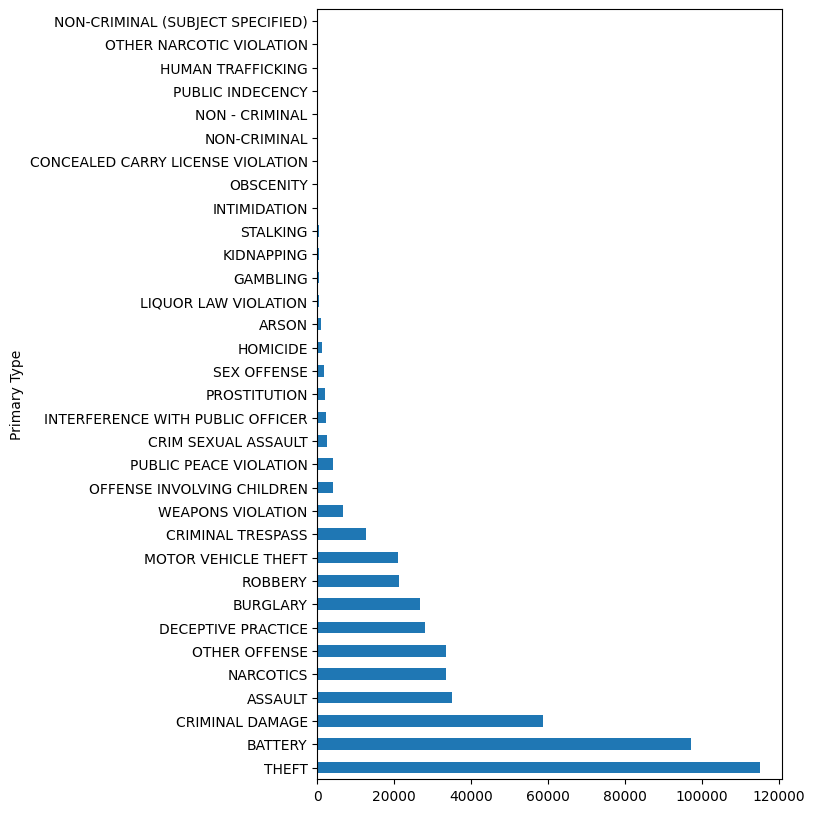

In [102]:
fig, ax_01 = plt.subplots(figsize=(6,10))
df['Primary Type'].value_counts().sort_values(ascending = False).plot(kind = 'barh', ax = ax_01)

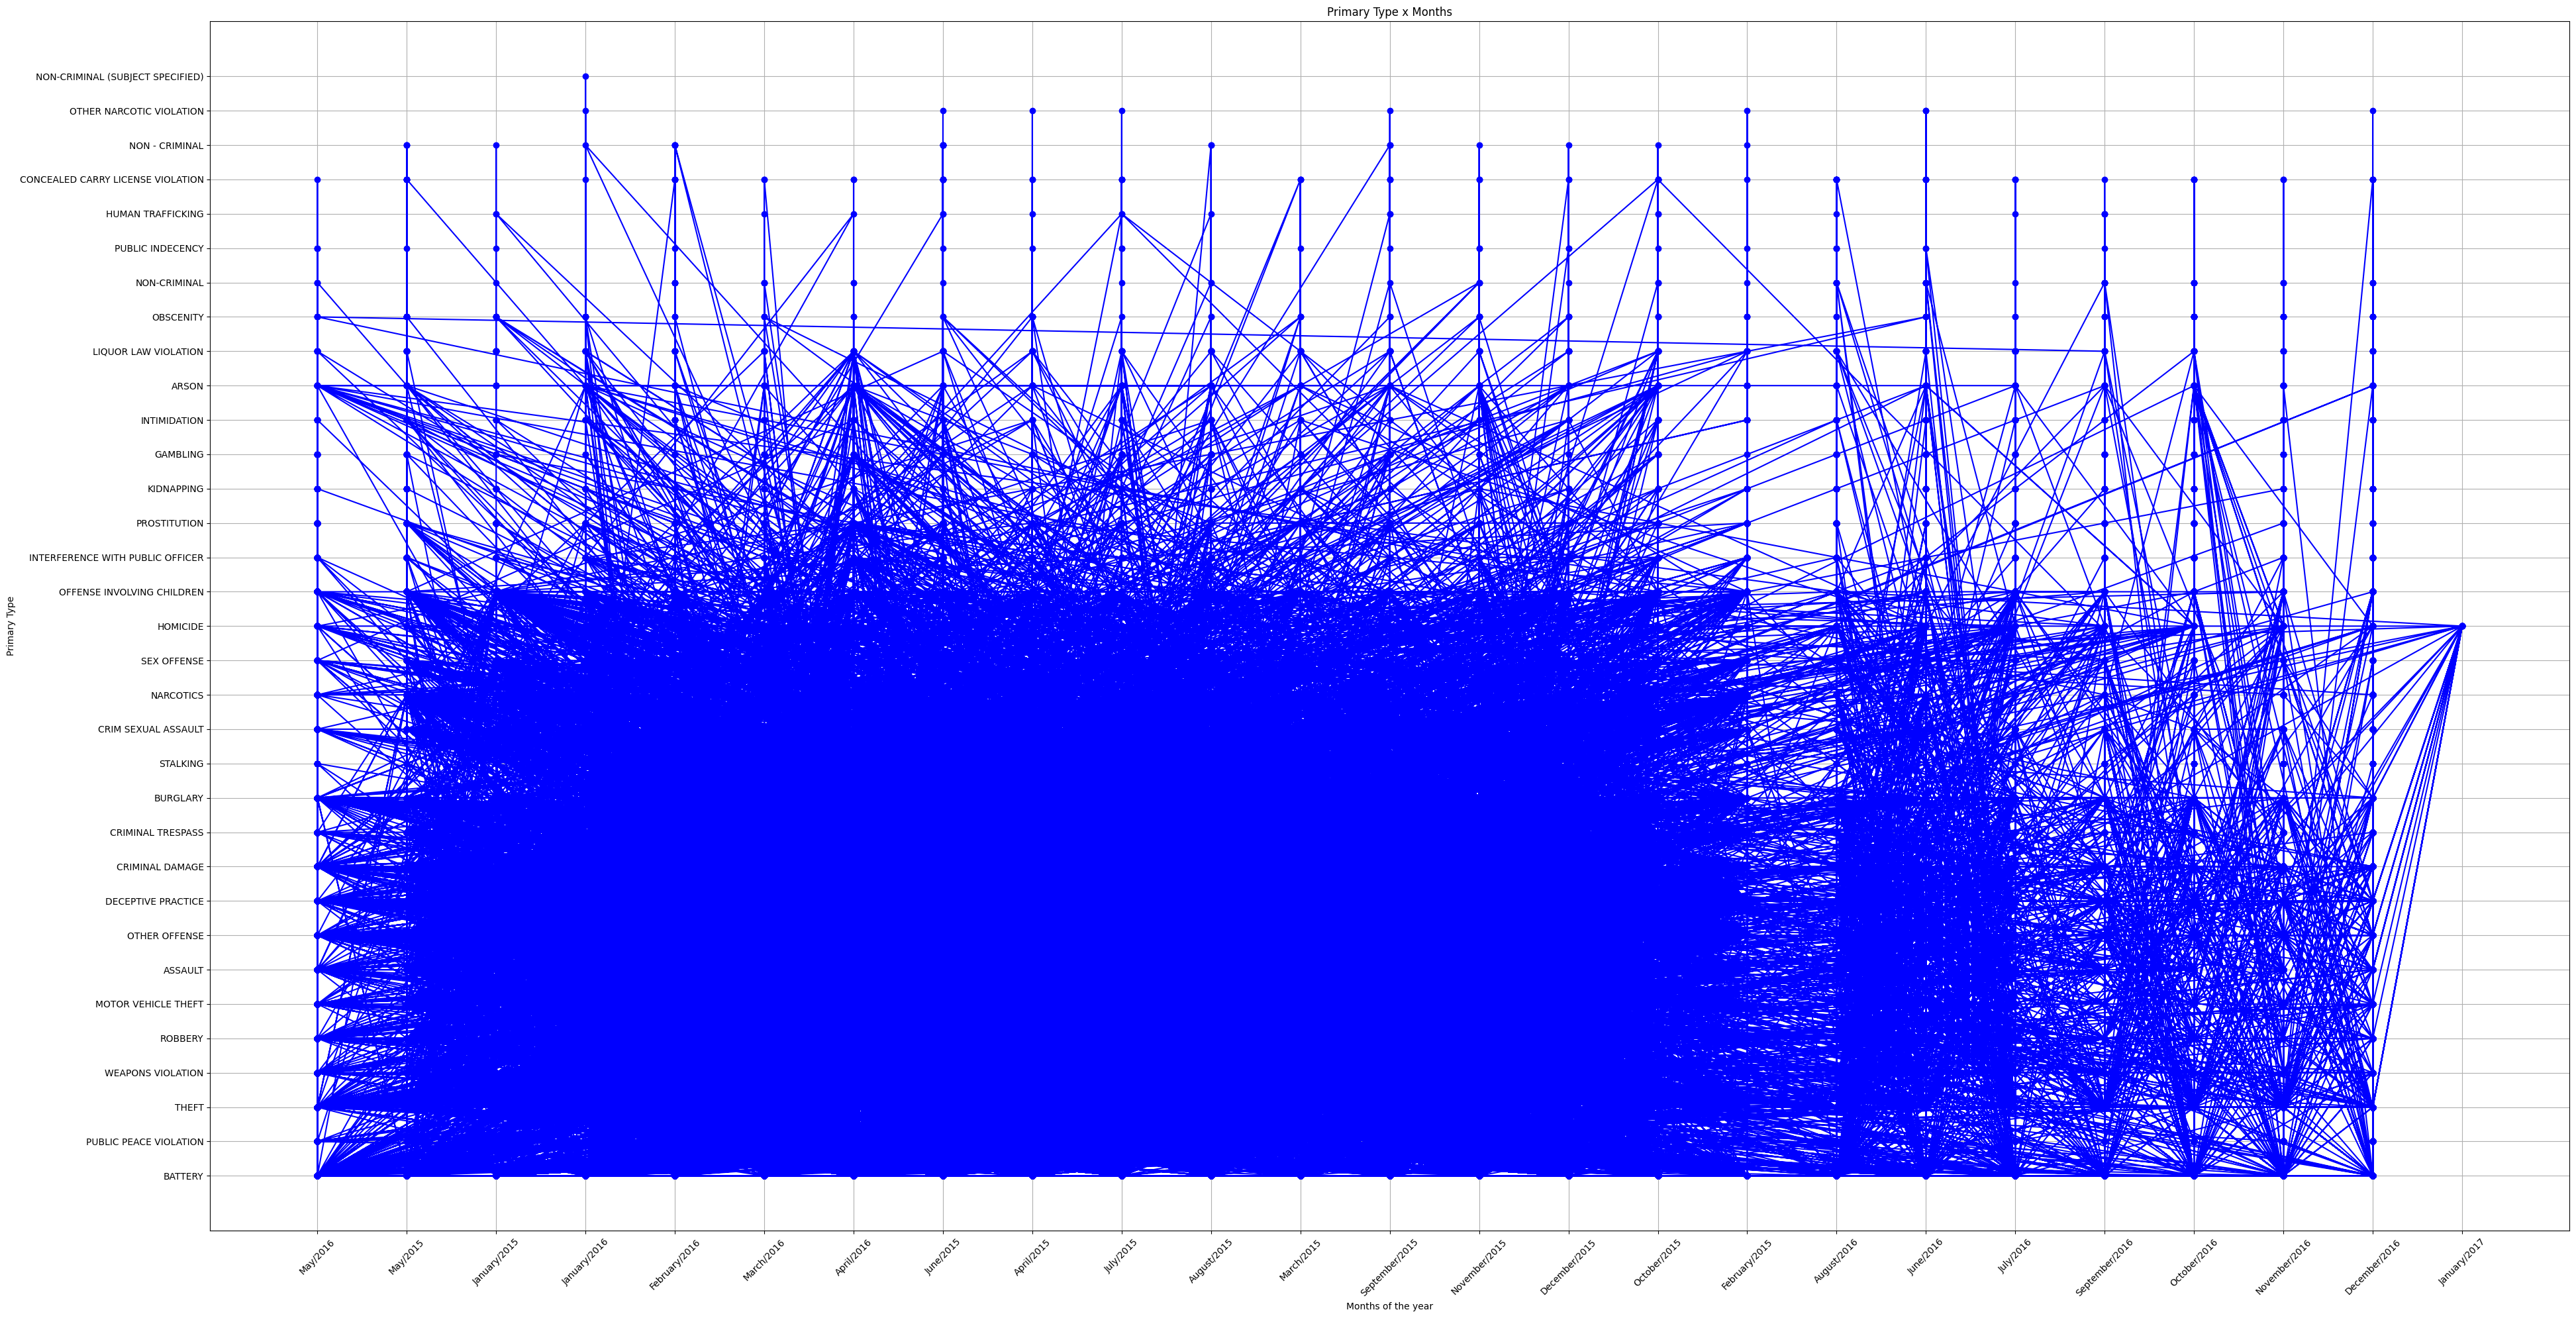

In [103]:
plt.figure(figsize=(39,20))
plt.plot(df['month_year'],df['Primary Type'], marker='o', linestyle = '-', color = 'b')
plt.title('Primary Type x Months')
plt.xlabel('Months of the year')
plt.ylabel('Primary Type')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### **Crimes relatados entre 22h e 2h**

In [104]:
#Novas colunas para Data e Hora
df.insert(0, 'Date_', pd.to_datetime(df['Date']).dt.date)
df.insert(1, 'Hour', pd.to_datetime(df['Date']).dt.time)
df.insert(0, 'Hour_', pd.to_datetime(df['Date']).dt.hour)

df_hour = df[['Date_','Hour_', 'Primary Type', 'Description', 'Location Description','Community Area']]

In [105]:
#DF para ocorrências no período 22h às 2h
df_hour = df_hour.rename(columns={'Primary Type': 'Primary_Type'})
df_filter = df_hour.loc[(df_hour['Hour_']>=22)|(df_hour['Hour_']<=2)]
display(df_filter)

,Date_,Hour_,Primary_Type,Description,Location Description,Community Area
0,2016-05-03,23,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,29.0
2,2016-05-03,23,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,25.0
3,2016-05-03,22,BATTERY,SIMPLE,SIDEWALK,25.0
4,2016-05-03,22,THEFT,$500 AND UNDER,RESIDENCE,25.0
5,2016-05-03,22,BATTERY,AGGRAVATED: HANDGUN,STREET,44.0
...,...,...,...,...,...,...
539808,2016-05-03,23,BATTERY,AGGRAVATED: HANDGUN,STREET,71.0
539809,2016-05-03,23,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,30.0
539810,2016-05-03,23,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,69.0
539811,2016-05-03,0,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,66.0


- Crimes praticados entre 22h e 2h - tail(30)

In [106]:
df_h = df_filter.groupby(['Primary_Type','Hour_']).agg({'Hour_':'count'})
df_h.tail(30)

Hour_
Primary_Type           Hour_       
PUBLIC PEACE VIOLATION 0        131
                       1        110
                       2         83
                       22       234
                       23       196
ROBBERY                0       1152
                       1       1007
                       2        921
                       22      1315
                       23      1231
SEX OFFENSE            0        169
                       1         56
                       2         42
                       22        63
                       23        57
STALKING               0         10
                       1         12
                       2          5
                       22        19
                       23         3
THEFT                  0       4208
                       1       2674
                       2       2231
                       22      4937
                       23      3867
WEAPONS VIOLATION      0        358
                       1        230
                       2        140
                       22       576
                       23       458

##### **Quantidade de roubos (theft) por hora/ano**

In [107]:
df_year = df[['Year','Hour_', 'Primary Type', 'Description', 'Location Description','Community Area']]
df_year = df_year.loc[(df_hour['Hour_']>=22)|(df_hour['Hour_']<=2)]

filtro = df_year['Primary Type'] == 'THEFT'
df_year_f = df_year[filtro]

df_year_f  = df_year_f.groupby(['Year','Hour_'])['Primary Type'].count()
df_year_f.head(30)

Year  Hour_
2015  0        2108
      1        1301
      2        1057
      22       2427
      23       1854
2016  0        2100
      1        1373
      2        1174
      22       2510
      23       2013
Name: Primary Type, dtype: int64

##### **Crimes com maior ocorrência por área**

- 30 maiores ocorrências por área

<Axes: ylabel='Primary Type,Community Area'>

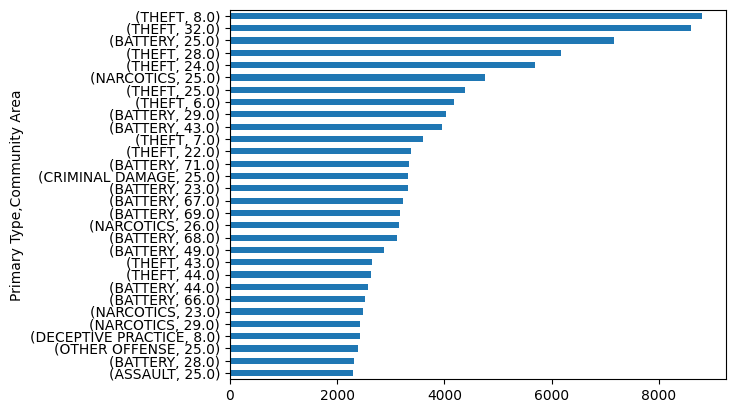

In [108]:
df_area = df[['Year','Primary Type', 'Description', 'Location Description', 'Community Area']]
x = df_area.groupby(['Primary Type','Community Area'])['Community Area'].count().sort_values().tail(30)
x.plot(kind='barh')

In [109]:
df_area.groupby(['Year', 'Primary Type','Community Area'])['Community Area'].count().sort_values().tail(30)

Year  Primary Type     Community Area
2015  NARCOTICS        29.0              1620
2016  BATTERY          23.0              1629
2015  BATTERY          67.0              1662
2016  BATTERY          71.0              1670
2015  BATTERY          71.0              1676
                       23.0              1695
      THEFT            7.0               1722
2016  THEFT            22.0              1769
      CRIMINAL DAMAGE  25.0              1790
      THEFT            7.0               1871
2015  BATTERY          29.0              1906
2016  BATTERY          43.0              1913
2015  NARCOTICS        26.0              1992
2016  THEFT            6.0               2032
2015  BATTERY          43.0              2050
2016  BATTERY          29.0              2127
2015  THEFT            6.0               2149
                       25.0              2167
2016  THEFT            25.0              2212
2015  THEFT            24.0              2625
                       28.0              2

<Axes: xlabel='Community Area', ylabel='Primary Type'>

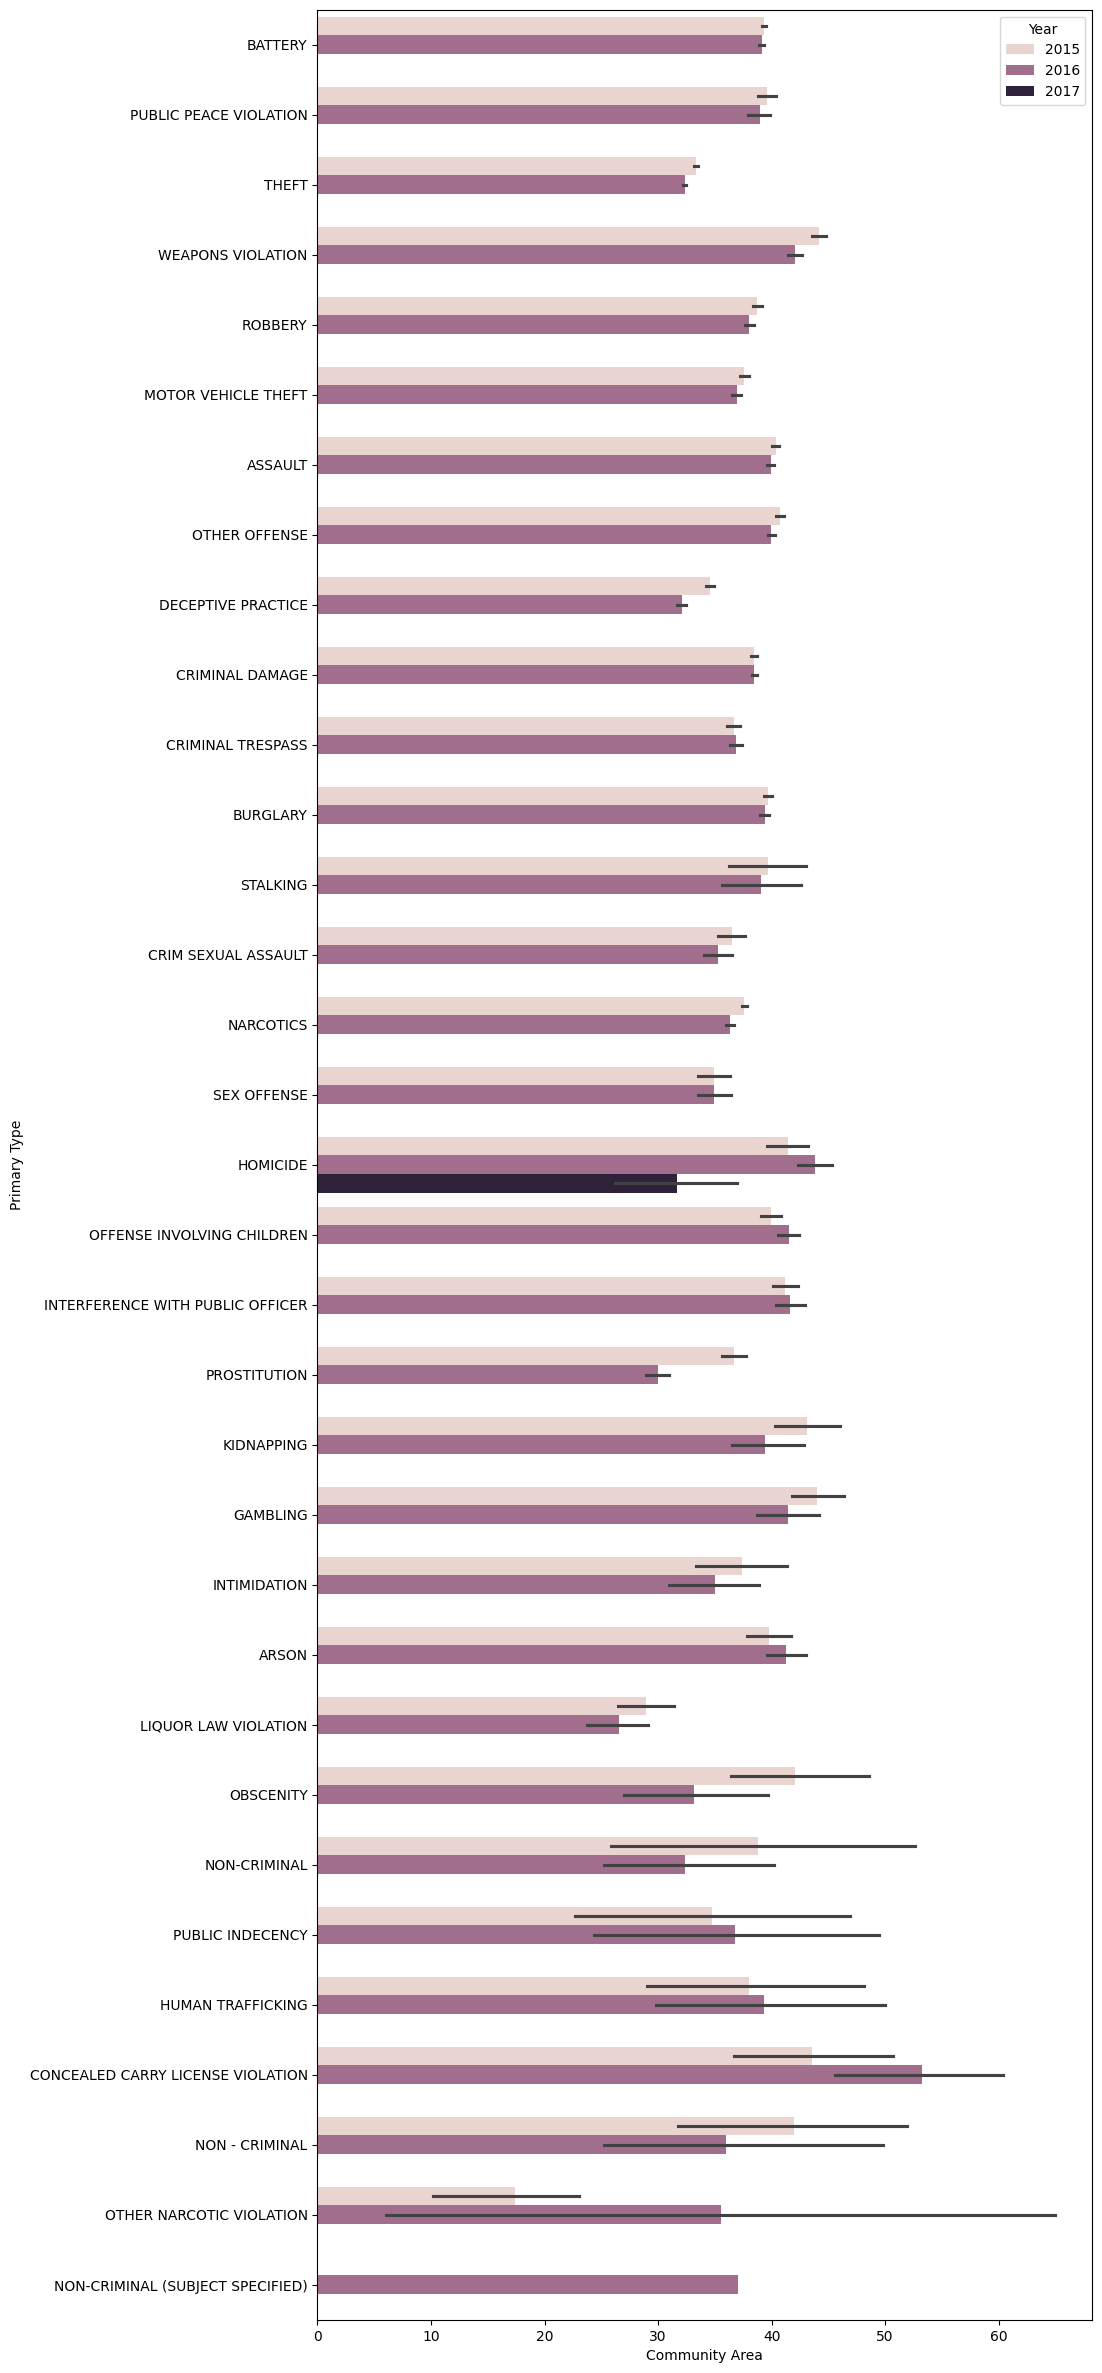

In [110]:
df_area.groupby(['Primary Type','Year'])["Community Area"].count()
df_area1 = df_area.reset_index()
plt.figure(figsize=(10, 30))
sns.barplot(x="Community Area", y="Primary Type", hue="Year", data=df_area1)

#####**40 maiores ocorrências de crimes com e sem prisão x por ano**

In [111]:
df_f = df[['Case Number','Hour_', 'Year', 'Primary Type', 'Description', 'Description', 'Domestic', 'Arrest', 'Community Area', 'Latitude', 'Longitude']]
df_f

,Case Number,Hour_,Year,Primary Type,Description,Description,Domestic,Arrest,Community Area,Latitude,Longitude
0,HZ250496,23,2016,BATTERY,DOMESTIC BATTERY SIMPLE,DOMESTIC BATTERY SIMPLE,True,True,29.0,41.864073,-87.706819
1,HZ250409,21,2016,BATTERY,DOMESTIC BATTERY SIMPLE,DOMESTIC BATTERY SIMPLE,True,False,42.0,41.782922,-87.604363
2,HZ250503,23,2016,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,RECKLESS CONDUCT,False,False,25.0,41.894908,-87.758372
3,HZ250424,22,2016,BATTERY,SIMPLE,SIMPLE,False,False,25.0,41.885687,-87.749516
4,HZ250455,22,2016,THEFT,$500 AND UNDER,$500 AND UNDER,True,False,25.0,41.886297,-87.761751
...,...,...,...,...,...,...,...,...,...,...,...
539809,HZ250507,23,2016,BATTERY,DOMESTIC BATTERY SIMPLE,DOMESTIC BATTERY SIMPLE,True,True,30.0,41.849222,-87.691556
539810,HZ250491,23,2016,CRIMINAL DAMAGE,TO PROPERTY,TO PROPERTY,True,True,69.0,41.760744,-87.633335
539811,HZ250479,0,2016,BATTERY,AGGRAVATED: HANDGUN,AGGRAVATED: HANDGUN,False,False,66.0,41.779235,-87.685207
539812,HZ250370,21,2016,BATTERY,DOMESTIC BATTERY SIMPLE,DOMESTIC BATTERY SIMPLE,True,False,46.0,41.745252,-87.552773


In [113]:
df_f = df.copy()
df_f['Arrest'] = df_f['Arrest'].replace({True: 'True', False: 'False'})
df_f['Arrest'] = df_f['Arrest'].apply(lambda x: x.replace('True', 'Y').replace('False', 'N'))

grupo_a = df_f.groupby(df_f['Arrest'])
select_a = grupo_a.get_group('Y')

df_f['count'] = df_f.groupby('Arrest')['Arrest'].transform('count')

df_f_1 = df_f.groupby(['Primary Type','Arrest','Year'])['Arrest'].value_counts().sort_values(ascending=False)[:50]
print(df_f_1)

Primary Type                      Arrest  Year
THEFT                             N       2016    52034
                                          2015    50112
BATTERY                           N       2016    38629
                                          2015    37063
CRIMINAL DAMAGE                   N       2016    28572
                                          2015    26700
NARCOTICS                         Y       2015    22831
ASSAULT                           N       2016    14681
DECEPTIVE PRACTICE                N       2015    13614
BURGLARY                          N       2016    13090
ASSAULT                           N       2015    12899
DECEPTIVE PRACTICE                N       2016    12868
OTHER OFFENSE                     N       2015    12637
                                          2016    12630
BURGLARY                          N       2015    12415
BATTERY                           Y       2015    11516
ROBBERY                           N       2016    10807
N

#####Mapa com os crimes praticados entre 2015 a 2017

In [115]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import folium
from folium import plugins

- Amostragem com 50% dos crimes

In [116]:
df_1 = df.sample(frac = 0.5)
df_1['Primary Type'].value_counts()

Primary Type
THEFT                                57538
BATTERY                              48811
CRIMINAL DAMAGE                      29230
ASSAULT                              17491
NARCOTICS                            16793
OTHER OFFENSE                        16656
DECEPTIVE PRACTICE                   13924
BURGLARY                             13364
MOTOR VEHICLE THEFT                  10646
ROBBERY                              10541
CRIMINAL TRESPASS                     6329
WEAPONS VIOLATION                     3326
OFFENSE INVOLVING CHILDREN            2017
PUBLIC PEACE VIOLATION                2014
CRIM SEXUAL ASSAULT                   1298
INTERFERENCE WITH PUBLIC OFFICER      1120
PROSTITUTION                          1026
SEX OFFENSE                            835
HOMICIDE                               620
ARSON                                  501
GAMBLING                               262
LIQUOR LAW VIOLATION                   242
KIDNAPPING                             18

In [117]:
coordenadas = []
for latitude, longitude in zip(df_1.Latitude.values[:2000],df.Longitude.values[:2000]):
  coordenadas.append([latitude, longitude])

map = folium.Map(location=[41.885686845, -87.749515983],zoom_start=10,  tiles="Cartodb dark_matter")
map.add_child(plugins.HeatMap(coordenadas))
map

- Salvar o mapa com as ocorrências (50%)

In [118]:
map.save('map-chicago-crime.html')